[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM.git/master?filepath=PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM/blob/master/PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)

#### based on Fig. 1 from Kreidenweis et al. 2003 (J. Geophys. Res. 108)  "_Modification of aerosol mass and size distribution due to aqueous‐phase SO2 oxidation in clouds: Comparisons of several models_"   
https://doi.org/10.1029/2002JD002697

In [1]:
"""
clone and install PySDM dependencies in Colab
"""
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('PySDM'):
        !git clone --depth 1 https://github.com/atmos-cloud-sim-uj/PySDM.git
        %cd PySDM
    else:
        %cd PySDM
        !git pull
    !pip --quiet install --requirement requirements.txt
    !ldconfig

In [2]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/PySDM
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [3]:
from PySDM_examples.Kreidenweis_et_al_2003 import Settings, Simulation
from PySDM_examples.utils.show_plot import show_plot
from PySDM.physics import si
import numpy as np
from matplotlib import pyplot

In [4]:
n_points = 6 if 'CI' not in os.environ else 2
nsd = np.logspace(0, n_points, num=n_points+1, base=2.0, dtype=int)
outputs = []

smax = []
droplet_number = []

In [6]:
for it in range(len(nsd)):
    settings = Settings(dt=1*si.s, n_sd=nsd[it], n_substep=10)
    settings.output_interval = 25 * si.s
    simulation = Simulation(settings)
    outputs.append(simulation.run())

In [10]:
for output in outputs:
    smax.append(np.nanmax(output["S_max"]))
    droplet_number.append(np.nanmax(output["n_c_cm3"]))

[0.32628843269142394, 0.28327118991529066, 0.27842850889459037, 0.2746960481142091, 0.27234254565409177]


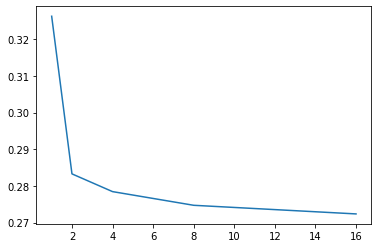

In [11]:
print(smax)
pyplot.plot(nsd, smax)
pyplot.show()

[641.1723941307044, 321.0085333859088, 320.58969240801156, 400.7360191579703, 360.6627548346782]


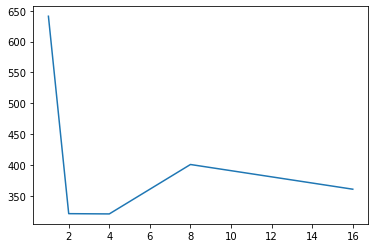

In [12]:
print(droplet_number)
pyplot.plot(nsd, droplet_number)
pyplot.show()